# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset

In [3]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


# Visualize the data

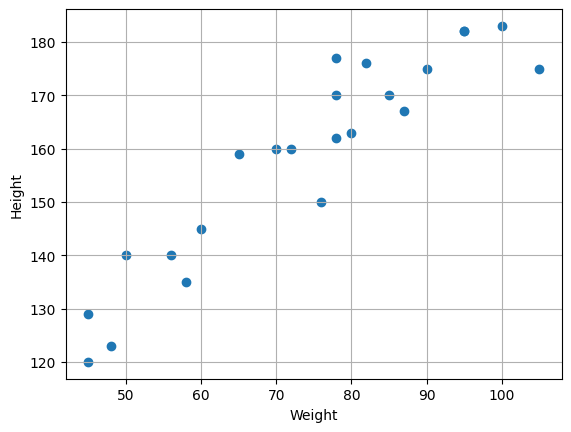

In [8]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.grid()

# Divide the dataset into dependent and independent features

In [26]:
X = df.drop('Height', axis=1)
y = df['Height']

In [27]:
X[:10]

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [28]:
y[:10]

0    120
1    135
2    123
3    145
4    160
5    162
6    163
7    175
8    182
9    170
Name: Height, dtype: int64

# Train test split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [31]:
X.shape, y.shape

((23, 1), (23,))

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

# Standerdize the independent data

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
X_train_scaled[:5]

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281]])

In [37]:
X_test_scaled[:5]

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

 # Train a simple linear regresion model

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
regressor = LinearRegression()

In [40]:
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [41]:
regressor.coef_

array([17.03440872])

In [42]:
regressor.intercept_


157.5

# Plot the bestfit line

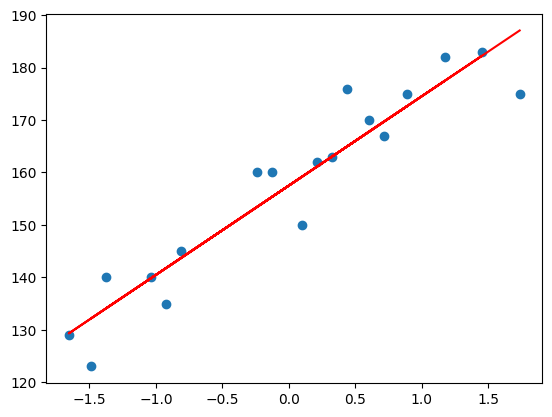

In [45]:
plt.scatter(X_train_scaled, y_train)
plt.plot(X_train_scaled, regressor.predict(X_train_scaled), c='r')

In [46]:
y_pred_test = regressor.predict(X_test_scaled)
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

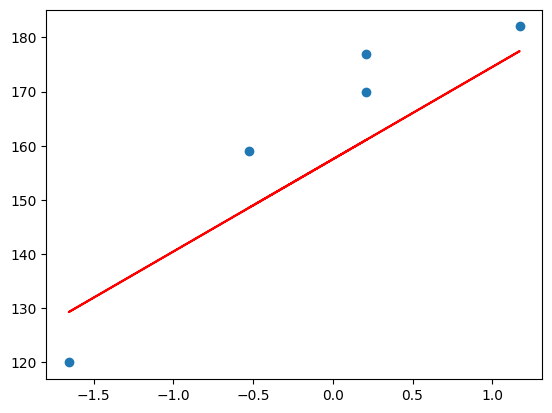

In [47]:
plt.scatter(X_test_scaled, y_test)
plt.plot(X_test_scaled, regressor.predict(X_test_scaled), c='r')

# Performance metrices

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [49]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2score = r2_score(y_test, y_pred_test)

In [50]:
errors = pd.DataFrame({'MSE':mse, 'MAE':mae, 'RMSE':rmse, 'R2':r2score}, index=['errors'])
errors

,MSE,MAE,RMSE,R2
errors,109.775926,9.822658,10.477401,0.776987


# Predict for a new datapoint 

In [51]:
weight = 80

In [54]:
scaled_weight = scaler.transform([[weight]])
scaled_weight

C:\Users\user\anaconda3\envs\mlenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [57]:
y_pred_new_data = regressor.predict(scaled_weight)
y_pred_new_data[0]

163.01076265919562

# Important assumptions

### 1 - Plot a scatter plot for the predictions

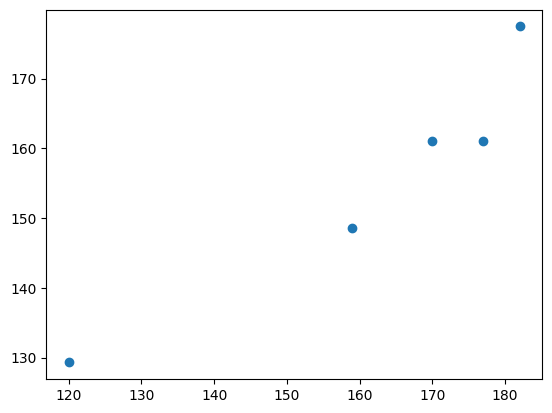

In [58]:
plt.scatter(y_test, y_pred_test)

### 2 - check the residuals

In [59]:
residuals = y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

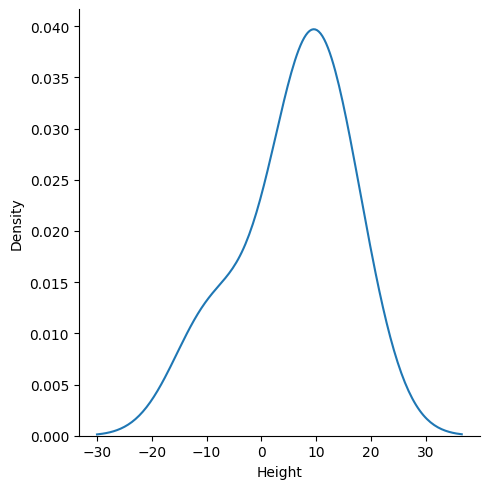

In [60]:
sns.displot(residuals, kind='kde')

C:\Users\user\AppData\Local\Temp\ipykernel_15724\2998397011.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True)


<Axes: xlabel='Height', ylabel='Density'>

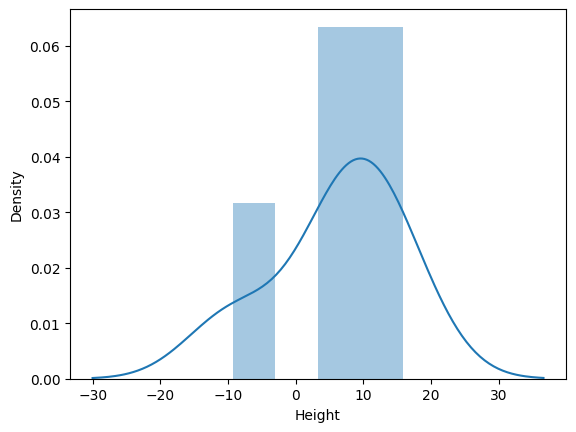

In [64]:
sns.distplot(residuals, kde=True)

#### Eventhough the diagram is little left skewered we were able to create a good model..

## 3-  Scatter plot with respect to prediction and residuals

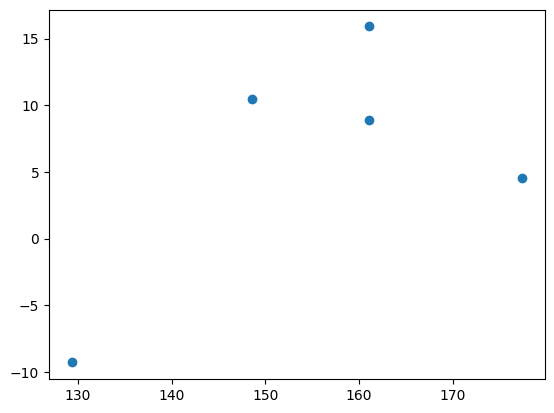

In [65]:
plt.scatter(y_pred_test, residuals)

#### In a well-fitted linear regression model, the prediction vs. residual plot should show residuals randomly scattered around zero, with no visible patterns or trends. This randomness indicates that the model appropriately captures the linear relationship between the predictors and the response variable without systematic biases. Residuals should be centered around zero, and their variance should remain consistent across all predicted values (homoscedasticity). If patterns like curves or funnels appear, it suggests potential issues such as non-linearity, heteroscedasticity, or model misspecification. While the residuals may appear uniformly scattered in the plot, they are typically expected to follow a normal distribution, not a uniform one.